# Wasserstein DRO

In [2]:
from dro.src.linear_model.wasserstein_dro import *

# Classification Task

## Load Data

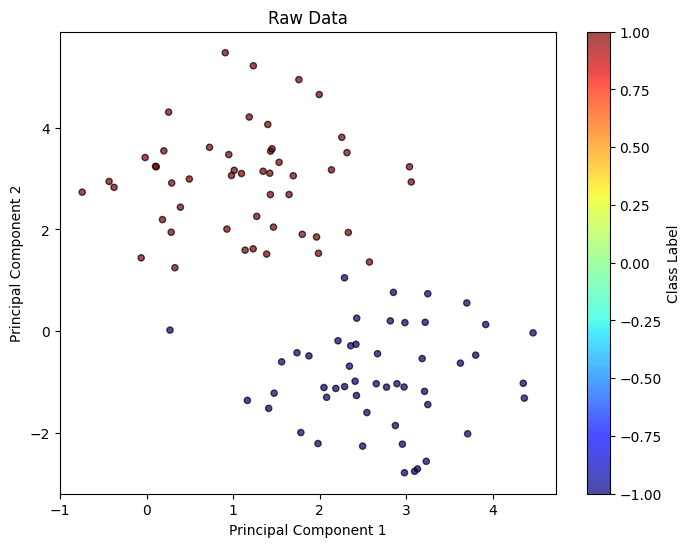

In [3]:
from dro.src.data.dataloader_regression import regression_basic
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification

X, y = classification_basic(d = 2, num_samples = 100, radius = 3, visualize = False)
draw_classification(X, y, title = 'Raw Data')

## Model Fit
Recall $X$ being the feature and $Y$ being the outcome, we allow both $Y = \theta^{\top}X$ and $Y = \theta^{\top}X + b$ by setting ``fit_intercept`` (default = True).

In [4]:
clf_model1 = WassersteinDRO(input_dim = 2, model_type = 'logistic')
clf_model1.update({'eps': 0.1, 'kappa': 'inf'})
clf_model1.fit(X, y)

{'theta': [-1.208003584870942, 1.2080035865776435], 'b': array(1.15966179)}

## Worst-case Distribution and Visualization
For SVM / Logistic / LAD, we provide two different worst-case distribution computations, 1 stands for asymptotic approximation, 2 stands for the exact calculation while requiring solving n optimization problems.

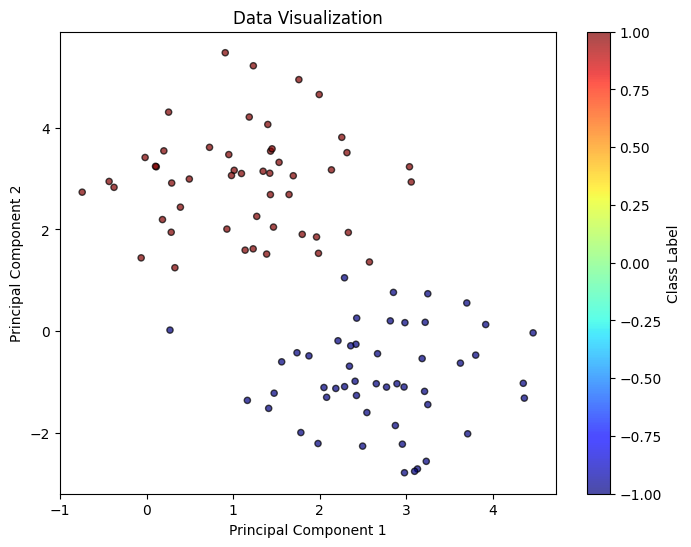

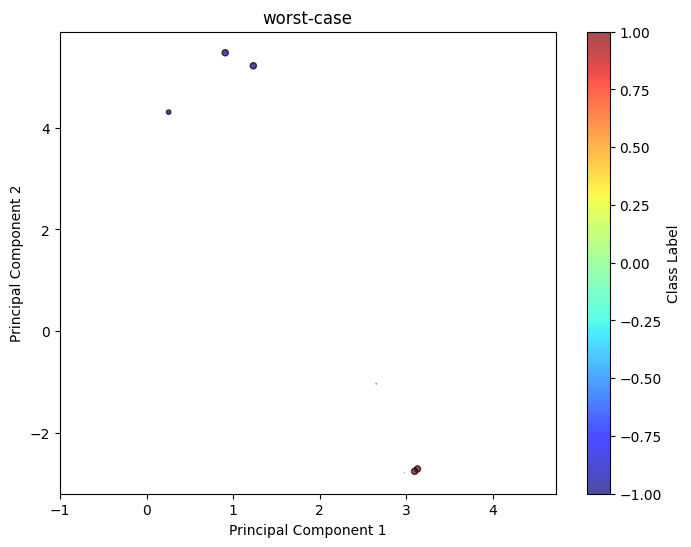

In [5]:
clf_model1.update({'eps': 0.1, 'kappa': 2})

worst_case_log = clf_model1.worst_distribution(X, y, 'asymp', 0.01)
draw_classification(X, y)
draw_classification(worst_case_log['sample_pts'][0][100:], worst_case_log['sample_pts'][1][100:], weight = worst_case_log['weight'][100:], title = 'worst-case', scale = 20)


## Robust Satisificng version of Wasserstein DRO
 

In [6]:
from dro.src.linear_model.wasserstein_dro import *

clf_model_rs = WassersteinDROsatisficing(input_dim = 2, model_type = 'svm')
clf_model_rs.fit(X, y)

{'theta': [-9.569193873337038e-17, 1.2730213999516989e-14],
 'b': array(0.03031427)}

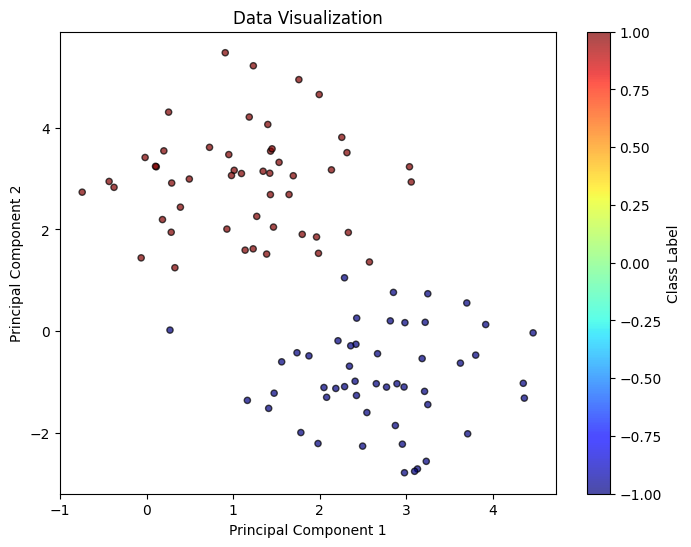

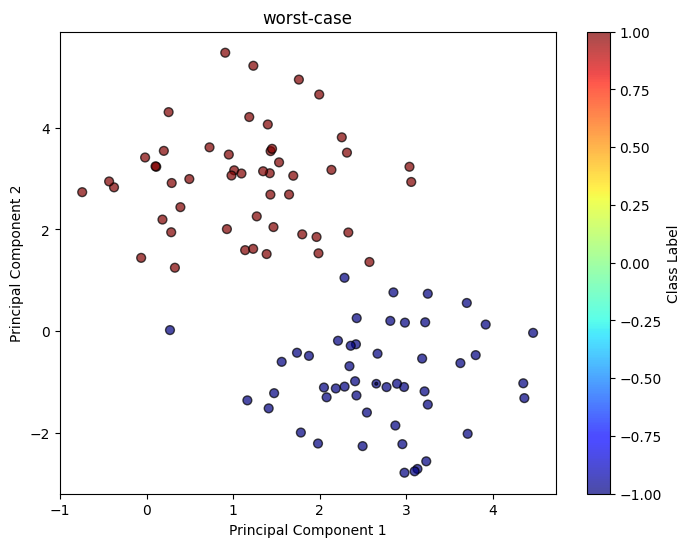

In [7]:
from dro.src.linear_model.wasserstein_dro import *
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification

X, y = classification_basic(d = 2, num_samples = 100, radius = 3, visualize = False)

clf_model1 = WassersteinDRO(input_dim = 2, model_type = 'logistic')
clf_model1.fit_intercept = False
clf_model1.update({'eps': 1.5, 'p': 'inf', 'kappa': 10})
clf_model1.fit(X, y)

worst_case_log = clf_model1.worst_distribution(X, y, 'asymp', 1)

draw_classification(X, y)
draw_classification(worst_case_log['sample_pts'][0], worst_case_log['sample_pts'][1], weight = worst_case_log['weight'], title = 'worst-case')

# Regression Task
We can construct similar models for Wasserstein DRO regression models, including ``lad`` and ``ols`` loss.

In [8]:
import numpy as np
from dro.src.linear_model.wasserstein_dro import *
from dro.src.data.dataloader_regression import regression_basic

feature_dim = 5
X, y = regression_basic(num_samples = 100, d = feature_dim, noise = 1)

reg_model = WassersteinDRO(input_dim = feature_dim, model_type = 'lad')

costM = np.identity(feature_dim)
costM[0][0] = 1
reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':2, 'kappa': 0.001})
print(reg_model.fit(X, y))

reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':2, 'kappa': 'inf'})
print(reg_model.fit(X, y))

reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':1, 'kappa': 'inf'})
print(reg_model.fit(X, y))


{'theta': [60.7303464138377, 98.62687565803654, 64.38050744405149, 56.75157019658433, 35.64014248777235], 'b': array(-0.01686764)}
{'theta': [3.4813060836775584e-12, 4.996418793689881e-12, 2.3206491216924255e-12, 3.2116809664310047e-12, 1.6101042960928221e-12], 'b': array(5.90939031)}
{'theta': [57.46100670695884, 57.461006707312464, 57.46100670699399, 57.461006706573606, 34.680078746063145], 'b': array(5.37018113)}


In [9]:
reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':2, 'kappa': 'inf'})
worst_case_log = reg_model.worst_distribution(X, y, 'asymp', 0.01)
worst_case_log['sample_pts'][0][-1]

array([ 0.97511973, -0.67716171, -0.01224677, -0.89725437,  0.07580456])